In [1]:
import numpy as np
import pandas as pd
import pyranges as pr
import gget
import glob
import networkx as nx
from scipy.stats import entropy
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from importlib import reload

# locals 
import regulatory_network as grn
import isoforms as iso

In [2]:
reload(iso)

fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/isoquant_prepared/isoforms.csv"
df = iso.load_isoquant(fpath)
print(f"{df.shape=}")
df.head()

df.shape=(27974, 13)


,gene_id,gene_name,gene_biotype,transcript_id,transcript_name,transcript_biotype,gene_counts,transcript_counts,gene_CPM,log_CPM,n_isoforms,tid,short_name
241462,ENSG00000128274,A4GALT,protein_coding,ENST00000249005,A4GALT-201,protein_coding,2144,9,23.041880,3.179797,4,1,201
241463,ENSG00000128274,A4GALT,protein_coding,ENST00000381278,A4GALT-202,protein_coding,2144,32,23.041880,3.179797,4,2,202
241460,ENSG00000128274,A4GALT,protein_coding,ENST00000401850,A4GALT-203,protein_coding,2144,2,23.041880,3.179797,4,3,203
241461,ENSG00000128274,A4GALT,protein_coding,ENST00000642412,A4GALT-206,protein_coding,2144,89,23.041880,3.179797,4,4,206
156088,ENSG00000094914,AAAS,protein_coding,ENST00000209873,AAAS-201,protein_coding,918,29,9.865879,2.385628,3,1,201


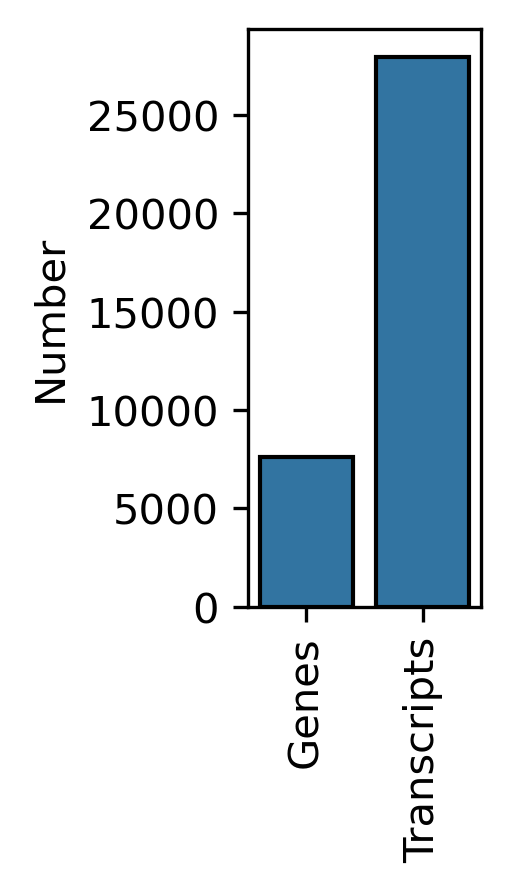

In [3]:
pdf = df.copy()

pdf = pdf[['gene_name', 'transcript_name']].nunique()

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 1, 2.5

sns.barplot(data=pdf, ec='k')
plt.ylabel("Number")
plt.xlabel("")

ax = plt.gca()
ax.set_xticklabels(["Genes", "Transcripts"])
ax.tick_params(axis='x', rotation=90)

# Isoforms per gene

In [4]:
pdf = df.copy()

pdf = pdf.groupby('gene_name').agg(
    n_isoforms = ('transcript_name', 'nunique'),
    mean_counts = ('transcript_counts', 'mean'),
    std_counts = ('transcript_counts', 'std'),
).reset_index().fillna(0)

pdf.head()

,gene_name,n_isoforms,mean_counts,std_counts
0,A4GALT,4,33.000000,39.471509
1,AAAS,3,15.666667,12.220202
2,AAGAB,4,100.250000,165.998745
3,AAK1,3,398.000000,678.112822
4,AAMDC,6,1854.000000,2844.197813


Text(0.5, 0, 'Expressed Transcripts per Gene')

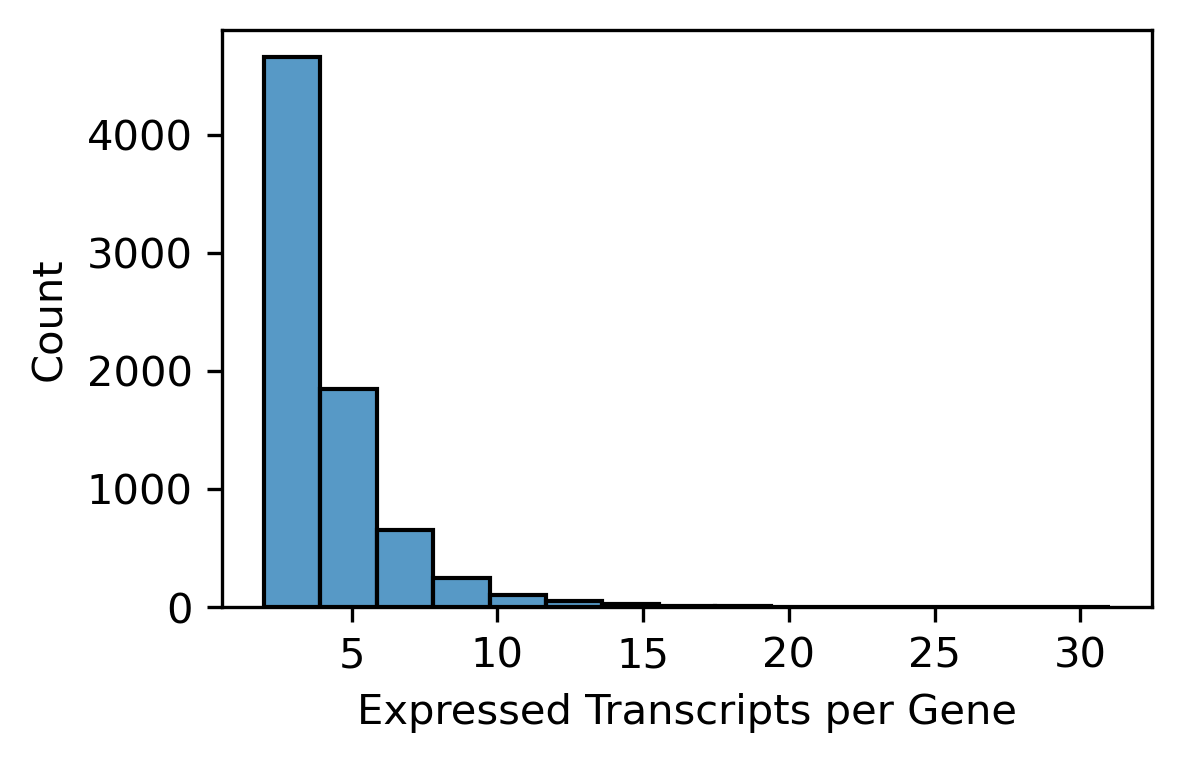

In [5]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4, 2.5
sns.histplot(data=pdf, 
             bins=15,
             x='n_isoforms')

plt.xlabel('Expressed Transcripts per Gene')

# Plots

88


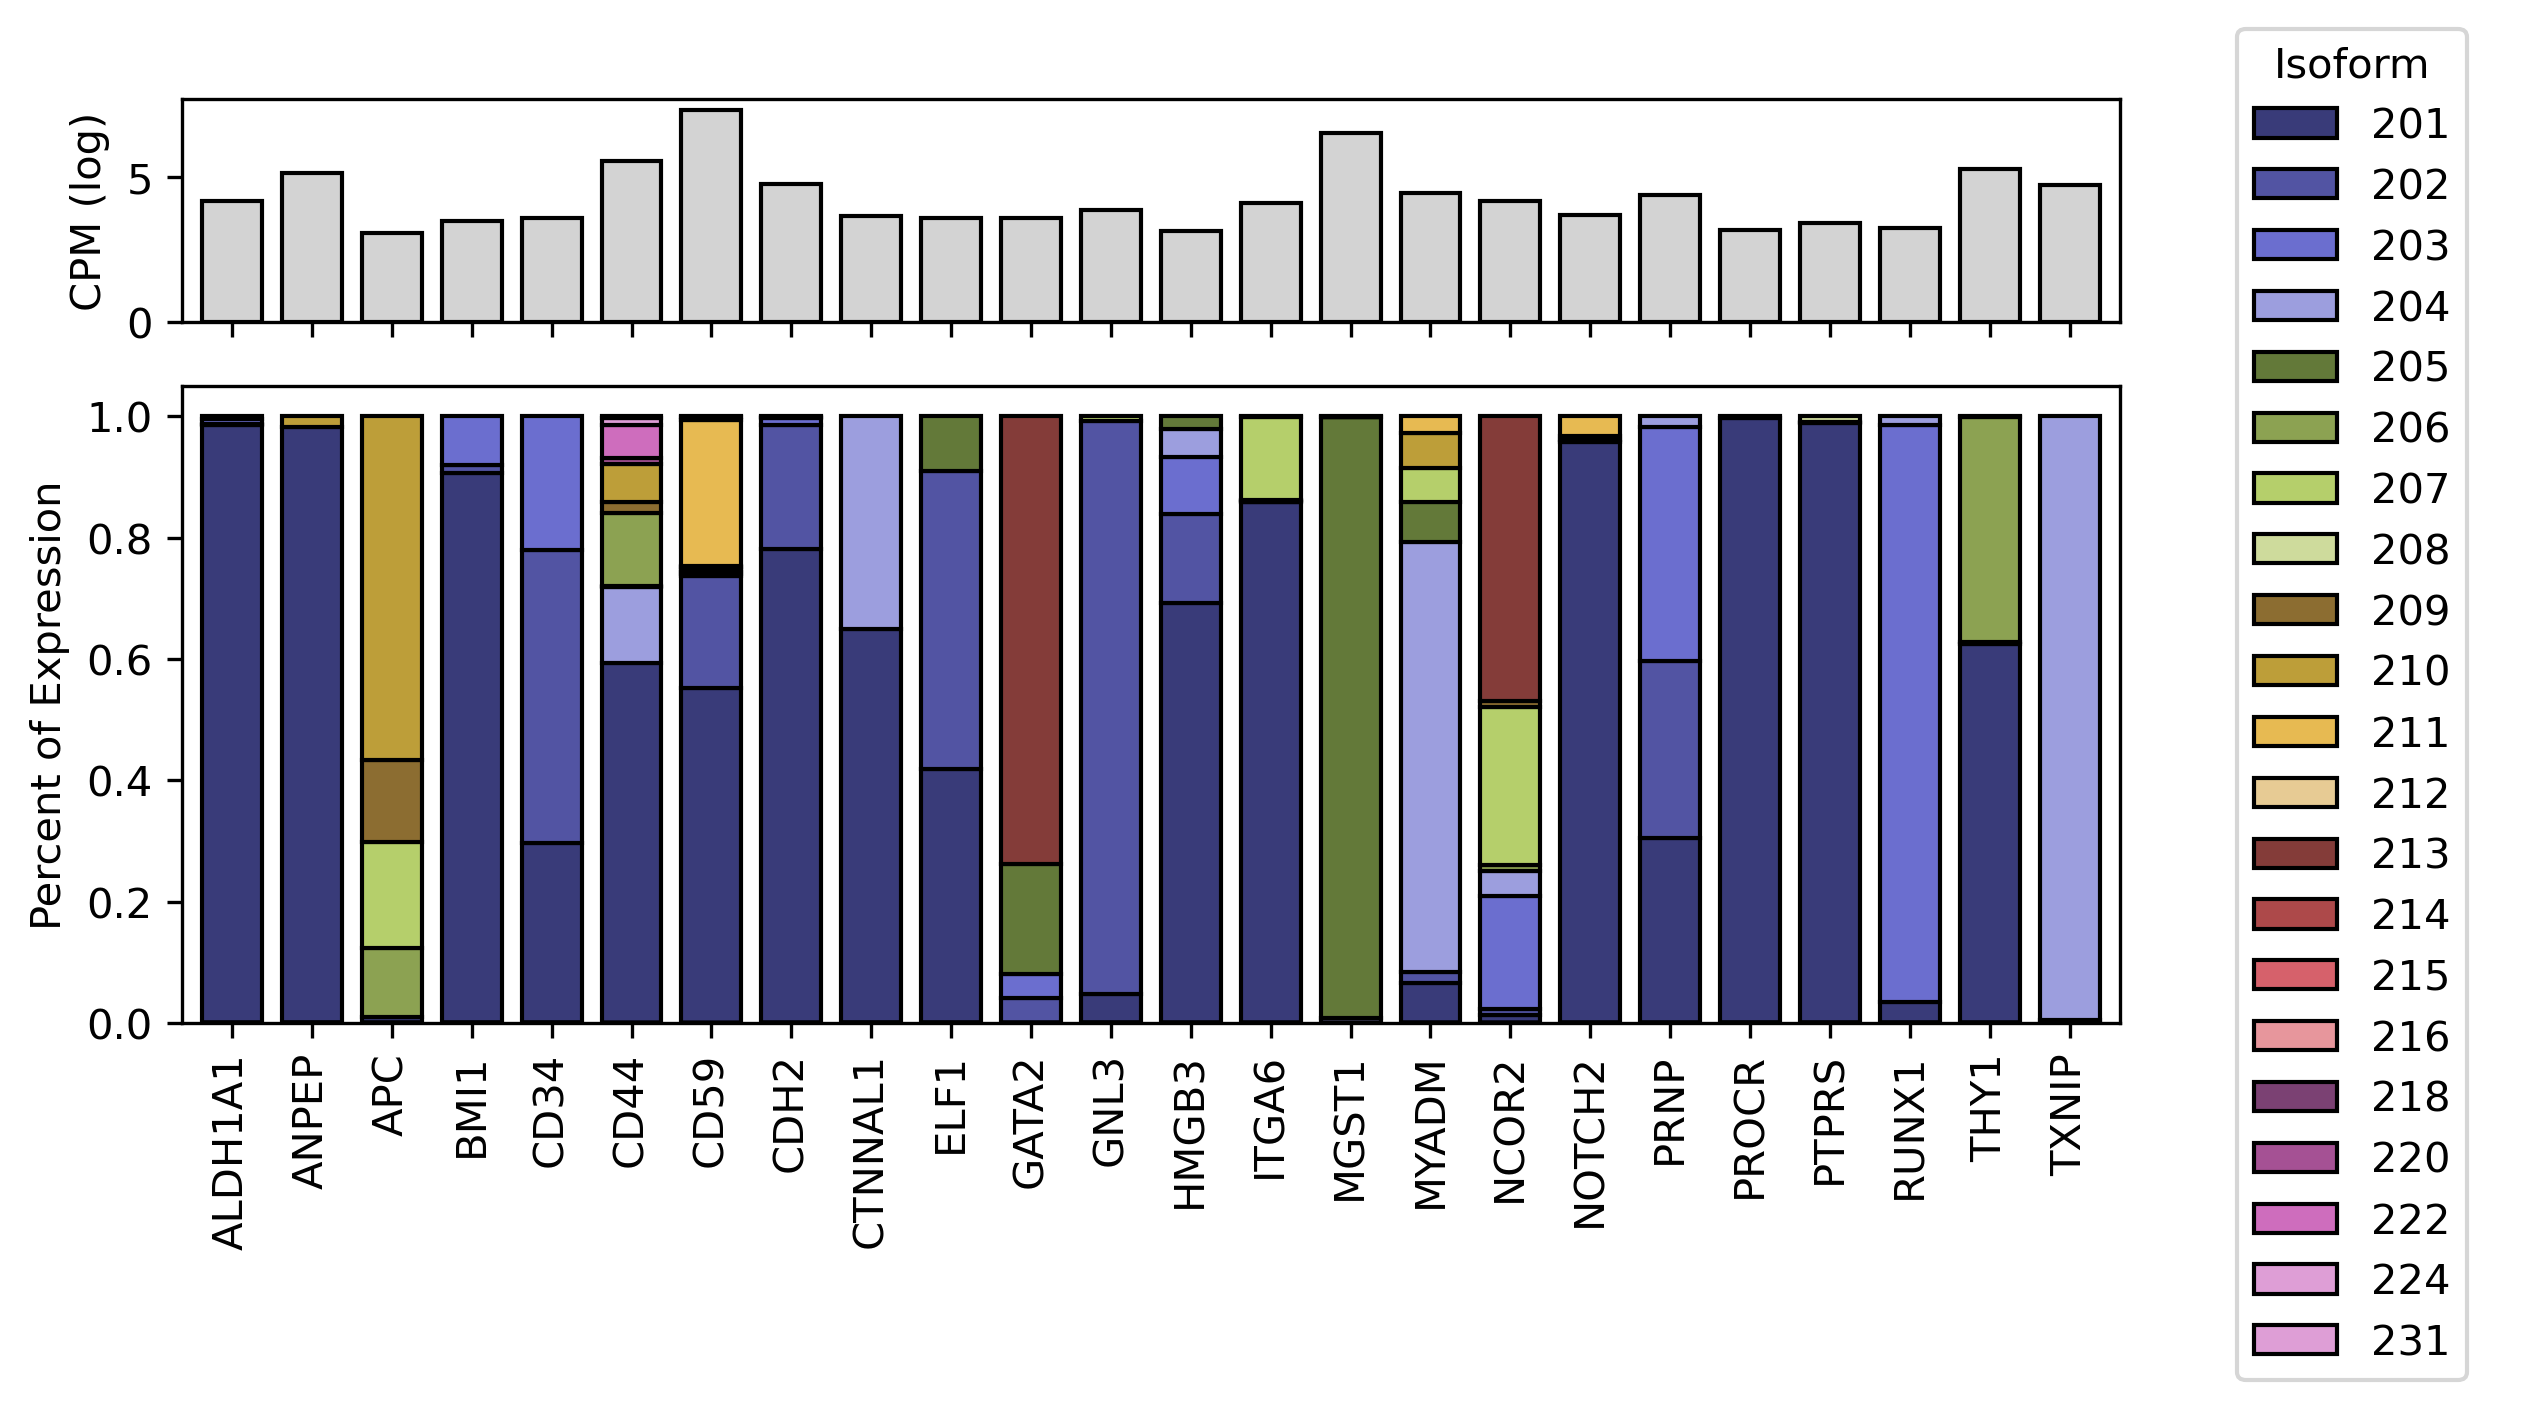

In [6]:
reload(iso)
    
pangloa = pd.read_csv("/home/cstansbu/git_repositories/ONT-single-cell/config/gene_annotations/panglaodb.csv")
cell_type = 'Hematopoietic stem cells'
genes = pangloa[pangloa['cell_type'] == cell_type]
genes = genes['gene_name'].values
print(len(genes))
    

pdf = df.copy()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 10, 4
iso.plot_isoform_expression(df, genes, count_threshold=1000)

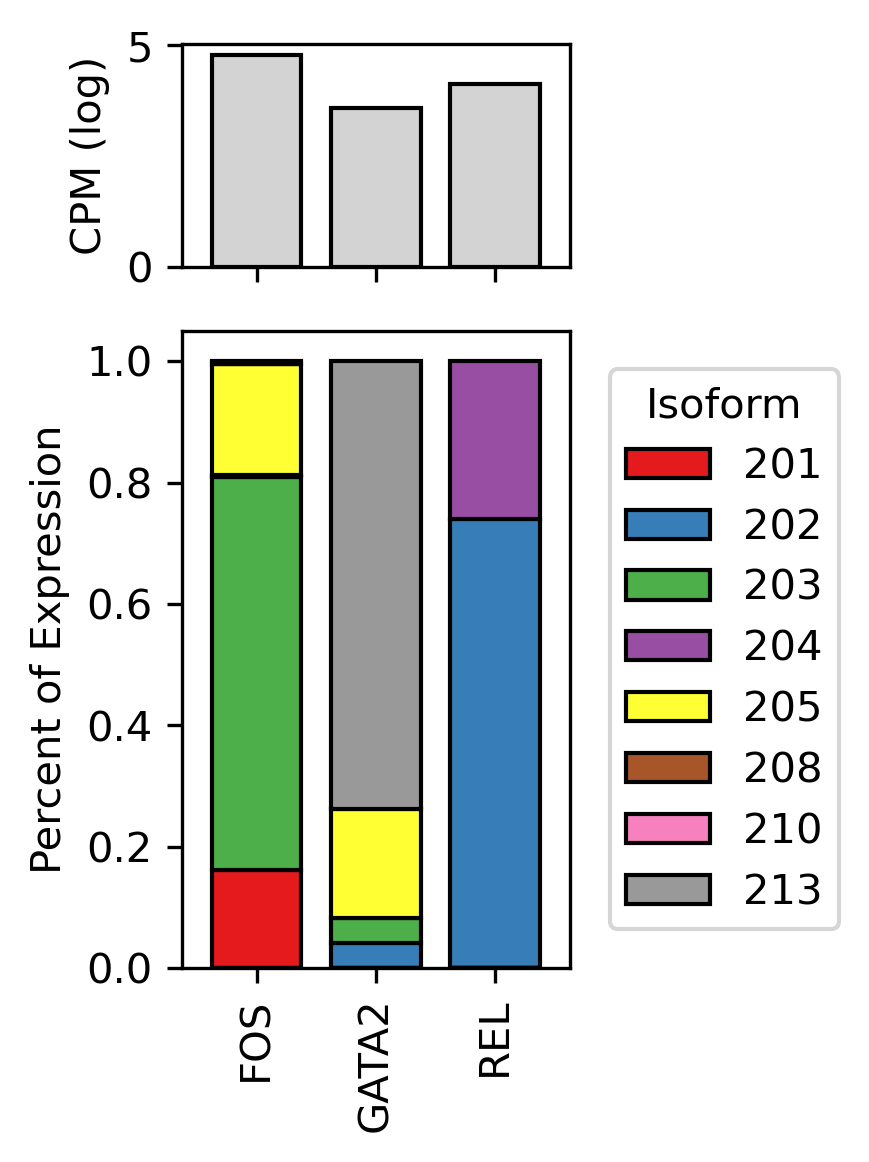

In [7]:
pdf = df.copy()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 2, 4
iso.plot_isoform_expression(df, 
                        ['GATA2', 'FOS', 'STAT5A', "REL", "GFI1B"], 
                        isoform_plot_kwargs={'cmap' : 'Set1'},
                        count_threshold=1)

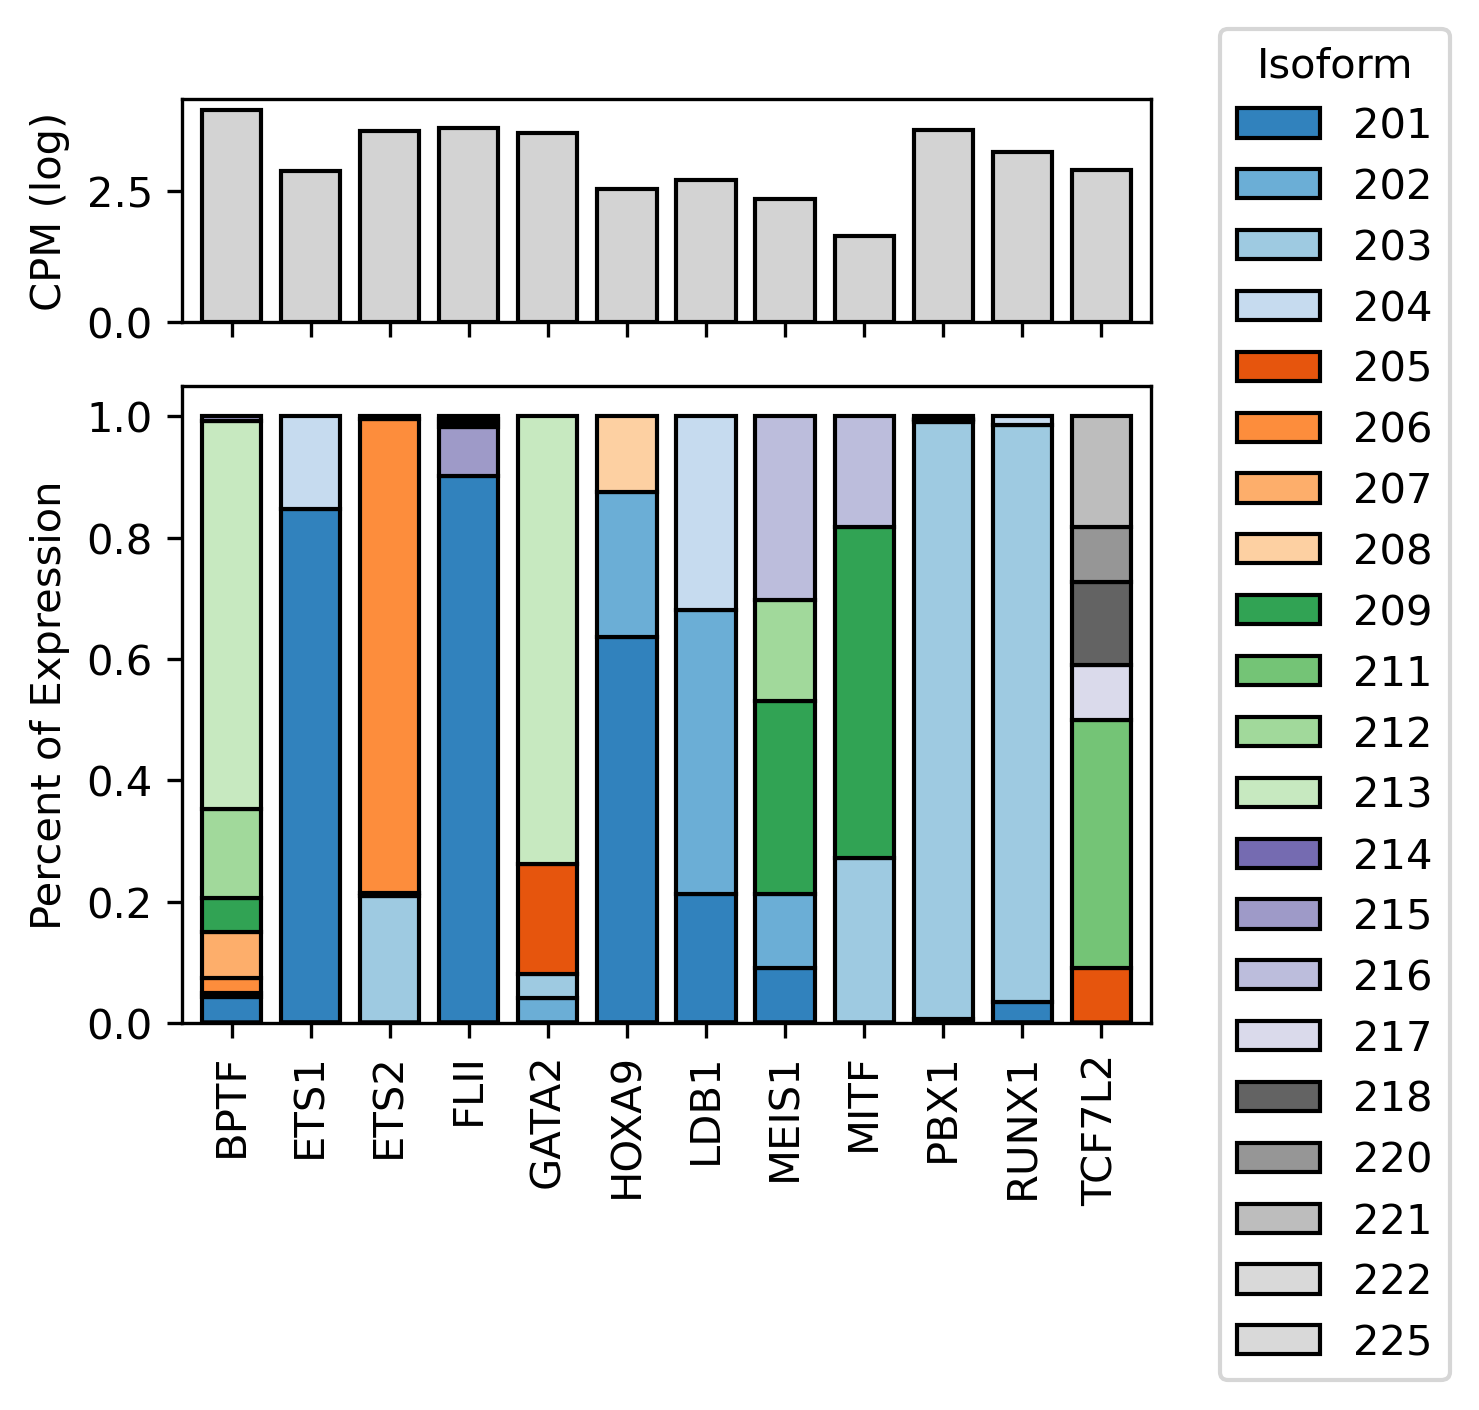

In [8]:
genes = [
 'TCF7L2','MITF', 'PRDM16', 'HOXA5',
 'HOXB4', 'GATA3', 'ETS1', 'ETS2',
 'PBX1', 'BPTF', 'HOXA9', 'FLII',
 'ERG', 'TAL1', 'MEIS1', 'LDB1',
 'GFI1B', 'IKZF1', 'RUNX1', 'HHEX',
 'SMARCC1', 'ETV6', 'NFE2', 'MYB',
 'GATA1', 'GATA2', 'LYL1', 'LMO2',   
]

pdf = df.copy()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 4
iso.plot_isoform_expression(df, 
                        genes, 
                        isoform_plot_kwargs={'cmap' : 'tab20c'},
                        count_threshold=1)

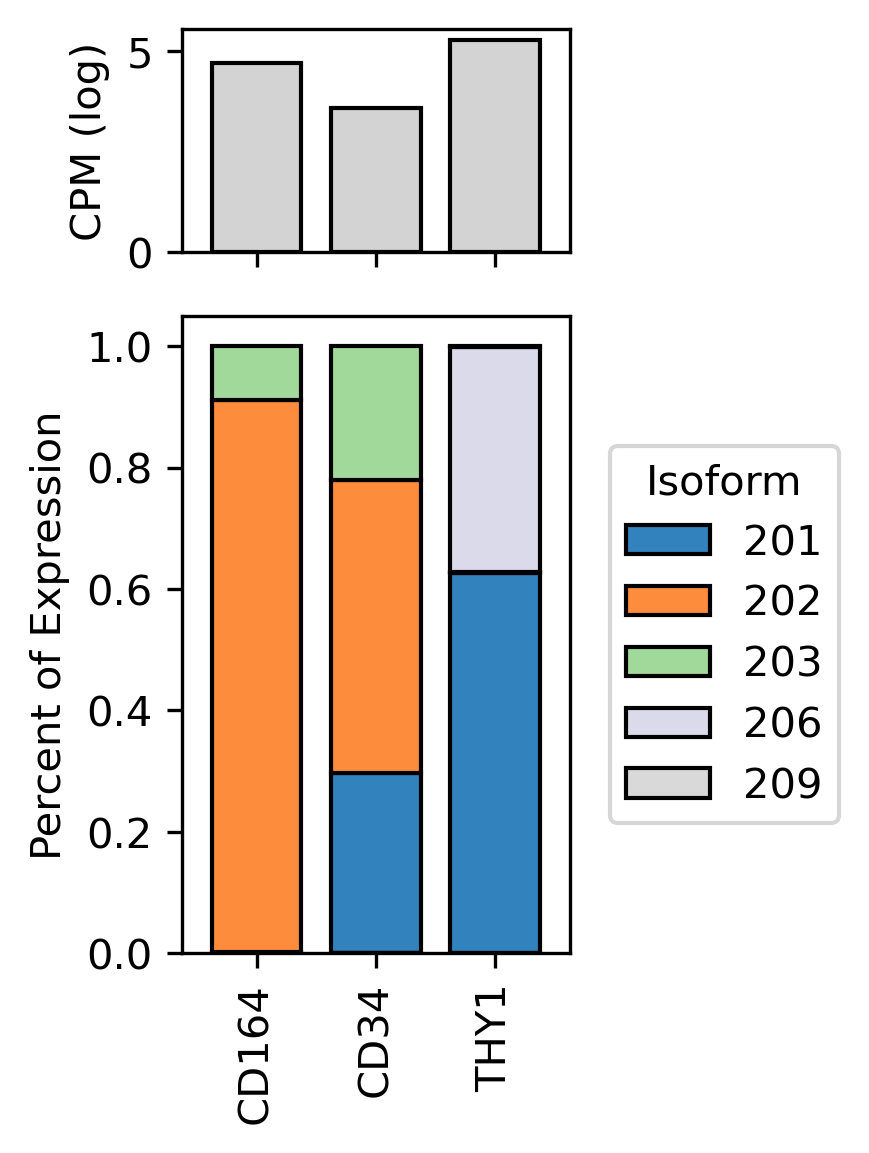

In [9]:
genes = [
    'CD34',
    'CD164',
    'THY1',
]

pdf = df.copy()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 2, 4
iso.plot_isoform_expression(df, 
                        genes, 
                        isoform_plot_kwargs={'cmap' : 'tab20c'},
                        count_threshold=1)

# Entropy

In [10]:
reload(iso)

pdf = df.copy()
pdf = iso.calculate_tx_percent(pdf, count_threshold=100)
pdf = iso.calculate_gene_entropy(pdf)
pdf = pdf.sort_values(by='entropy', ascending=False)
print(f"{pdf.shape=}")
pdf.head()

pdf.shape=(27618, 15)


,gene_id,gene_name,gene_biotype,transcript_id,transcript_name,transcript_biotype,gene_counts,transcript_counts,gene_CPM,log_CPM,n_isoforms,tid,short_name,tx_percent,entropy
22070,ENSG00000196141,SPATS2L,protein_coding,ENST00000360760,SPATS2L-202,protein_coding,8736,156,93.887061,4.552687,18,2,202,0.160494,3.47146
22074,ENSG00000196141,SPATS2L,protein_coding,ENST00000409397,SPATS2L-207,protein_coding,8736,9,93.887061,4.552687,18,6,207,0.009259,3.47146
22075,ENSG00000196141,SPATS2L,protein_coding,ENST00000409718,SPATS2L-208,protein_coding,8736,46,93.887061,4.552687,18,7,208,0.047325,3.47146
22071,ENSG00000196141,SPATS2L,protein_coding,ENST00000366118,SPATS2L-203,protein_coding,8736,7,93.887061,4.552687,18,3,203,0.007202,3.47146
22078,ENSG00000196141,SPATS2L,protein_coding,ENST00000423749,SPATS2L-211,protein_coding,8736,84,93.887061,4.552687,18,10,211,0.086420,3.47146


In [11]:
tdf = pdf.copy()
tdf = tdf[['gene_name', 'entropy']].drop_duplicates()
tdf.head(15)

,gene_name,entropy
22070,SPATS2L,3.471460
4302,CEP57L1,3.461581
11465,ITGB1,3.434748
10487,HNRNPC,3.389041
9652,GOSR2,3.284395
6592,DLG1,3.262830
13064,MATR3,3.235547
3376,CAST,3.205472
23266,TCF4,3.203914
21596,SMARCA2,3.187494


In [12]:
n_genes = 30
database = 'TRRUST_Transcription_Factors_2019'
# database = 'TRANSFAC_and_JASPAR_PWMs'

edf = gget.enrichr(tdf['gene_name'].head(n_genes).values, database=database)

for _, row in edf.head(10).iterrows():
    print(f"{row['adj_p_val']:.4}", row['path_name'], row['overlapping_genes'])

Fri May 31 11:27:19 2024 INFO Performing Enichr analysis using database TRRUST_Transcription_Factors_2019.


0.0106 TP63 human ['TCF4', 'BRCA1']
0.05995 SOX4 mouse ['TCF4']
0.05995 E2F6 human ['BRCA1']
0.05995 NCOA3 human ['BRCA1']
0.05995 FOXF2 human ['ITGB1']
0.05995 CUX1 human ['RACGAP1']
0.05995 E2F4 mouse ['BRCA1']
0.05995 RBL2 mouse ['BRCA1']
0.05995 MEN1 human ['BRCA1']
0.05995 FOXP3 human ['BRCA1']


In [13]:
n_genes = 30
database = 'TRANSFAC_and_JASPAR_PWMs'

edf = gget.enrichr(tdf['gene_name'].head(n_genes).values, database=database)

for _, row in edf.head(10).iterrows():
    print(f"{row['adj_p_val']:.4}", row['path_name'], row['overlapping_genes'])

Fri May 31 11:27:20 2024 INFO Performing Enichr analysis using database TRANSFAC_and_JASPAR_PWMs.


0.08063 FOXL1 (human) ['CAST', 'NUMA1', 'UBE2D3', 'NAP1L1', 'BRCA1', 'KLC1', 'SMARCA2', 'PLD3', 'EPN2', 'DHDDS', 'GOLGA3', 'CEP57L1', 'VEPH1', 'TTC3', 'CPNE1', 'SPATS2L', 'ZNF415', 'TCF4']
0.134 HNF1A (human) ['VEPH1', 'GOSR2', 'TTC3', 'UBE2D3', 'SPATS2L', 'HNRNPC', 'SMARCA2', 'PLD3', 'SYNE1']
0.1424 USF2 (human) ['CAST', 'ITGB1', 'UBE2D3', 'BRCA1', 'DMKN', 'GIGYF2', 'DHDDS', 'SYNE1', 'GOLGA3', 'VEPH1', 'TTC3', 'HNRNPC', 'ZC3H14']
0.1588 HNF4A (human) ['GOLGA3', 'CEP57L1', 'VEPH1', 'GOSR2', 'HNRNPC', 'DMKN', 'PLD3', 'EPN2', 'SYNE1']
0.1588 RXRA (human) ['BRCA1', 'DMKN', 'ZC3H14', 'GIGYF2', 'PLD3', 'DHDDS', 'SYNE1']
0.1588 CBFB (human) ['GOLGA3', 'CEP57L1', 'UBE2D3', 'OCIAD1', 'ZC3H14']
0.1588 Pax2 (mouse) ['CEP57L1', 'GOSR2', 'UBE2D3', 'CPNE1', 'DMKN', 'KLC1', 'SMARCA2']
0.1588 NR5A2 (human) ['GOLGA3', 'NUMA1', 'RACGAP1', 'VEPH1', 'OCIAD1', 'CPNE1', 'MATR3', 'BRCA1', 'DMKN', 'GIGYF2', 'DHDDS', 'SYNE1']
0.1588 FOXO3A (human) ['DLG1', 'SPATS2L', 'GIGYF2', 'PLD3', 'DHDDS']
0.1588 NKX3-1 (

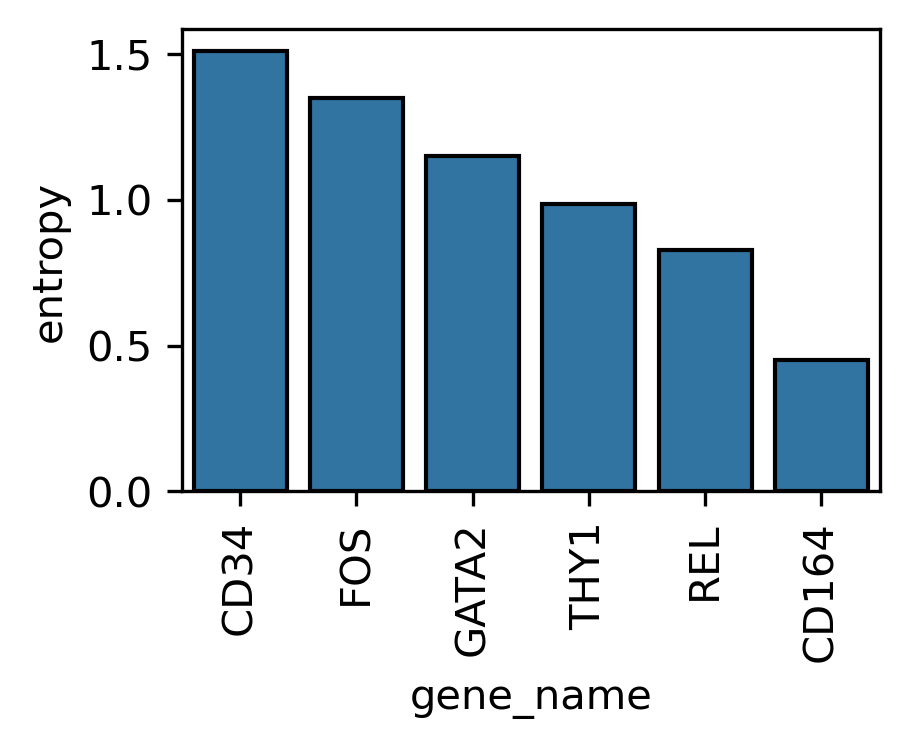

In [14]:
genes = [
    'CD34',
    'CD164',
    'THY1',
    'GATA2',
    'STAT5A',
    'REL',
    'FOS',
]

mask = tdf['gene_name'].isin(genes)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3, 2

sns.barplot(data=tdf[mask],
            x='gene_name',
            y='entropy',
            ec='k')

plt.gca().tick_params(axis='x', rotation=90)

pdf.shape=(27618, 15)


,gene_name,gene_biotype,gene_counts,gene_CPM,log_CPM,n_isoforms,entropy
22070,SPATS2L,protein_coding,8736,93.887061,4.552687,18,3.471460
4302,CEP57L1,protein_coding,1388,14.917038,2.767390,13,3.461581
11465,ITGB1,protein_coding,50822,546.191419,6.304799,22,3.434748
10487,HNRNPC,protein_coding,22333,240.015996,5.484863,20,3.389041
9652,GOSR2,protein_coding,2015,21.655498,3.120403,14,3.284395


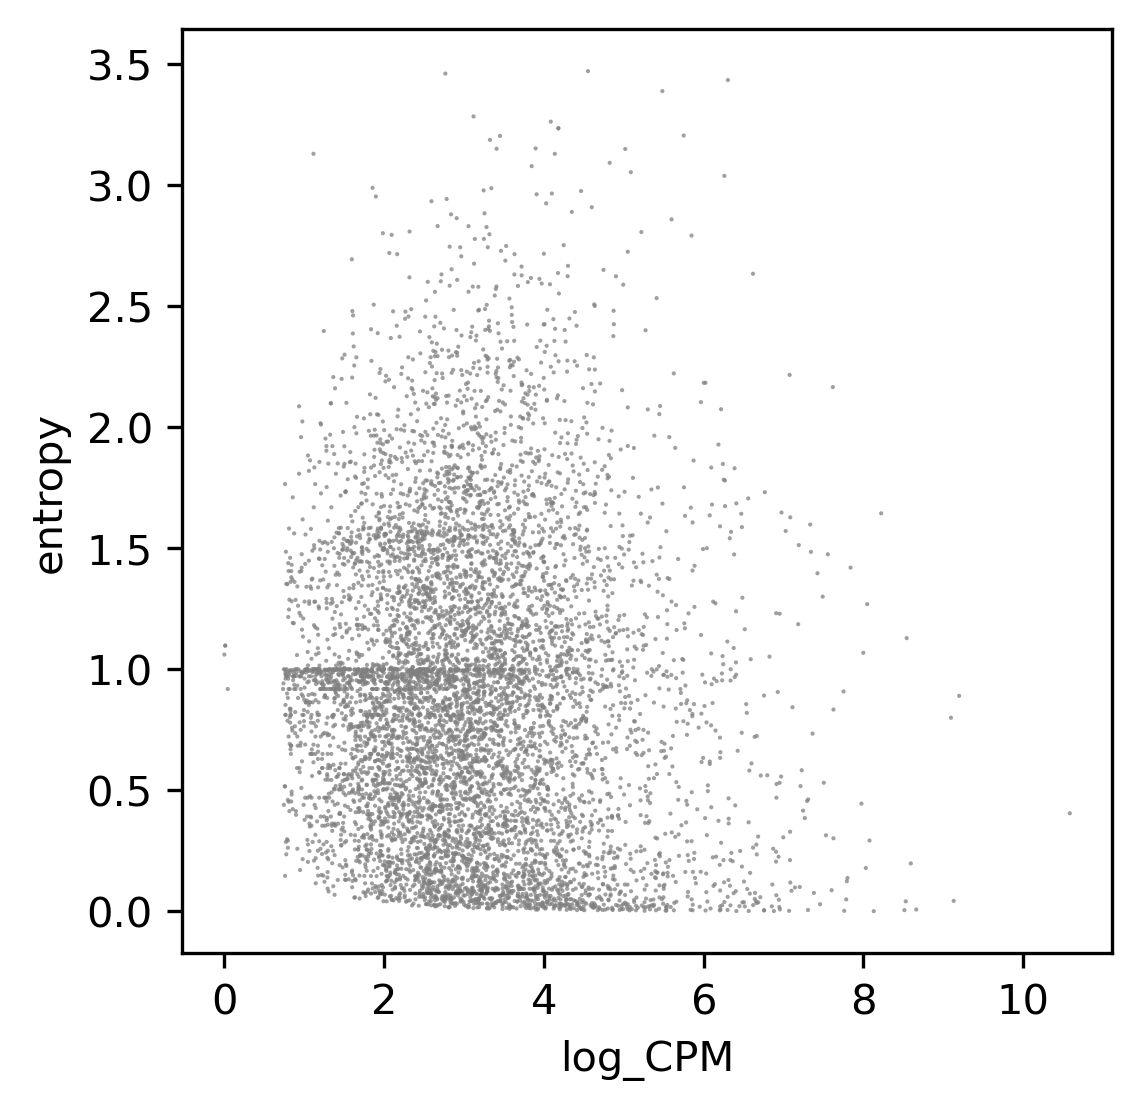

In [15]:
pdf = df.copy()
pdf = iso.calculate_tx_percent(pdf, count_threshold=100)
pdf = iso.calculate_gene_entropy(pdf)
pdf = pdf.sort_values(by='entropy', ascending=False)
print(f"{pdf.shape=}")
pdf = iso.extract_gene_data(pdf)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4, 4

sns.scatterplot(data=pdf, 
                x='log_CPM',
                y='entropy',
                ec='none',
                color="grey",
                alpha=0.75,
                s=1,
               )

pdf.head()

In [16]:
# break

# cell type specic isoform entropy

pangloa.shape=(1434, 7)
pangloa.shape=(394, 7)


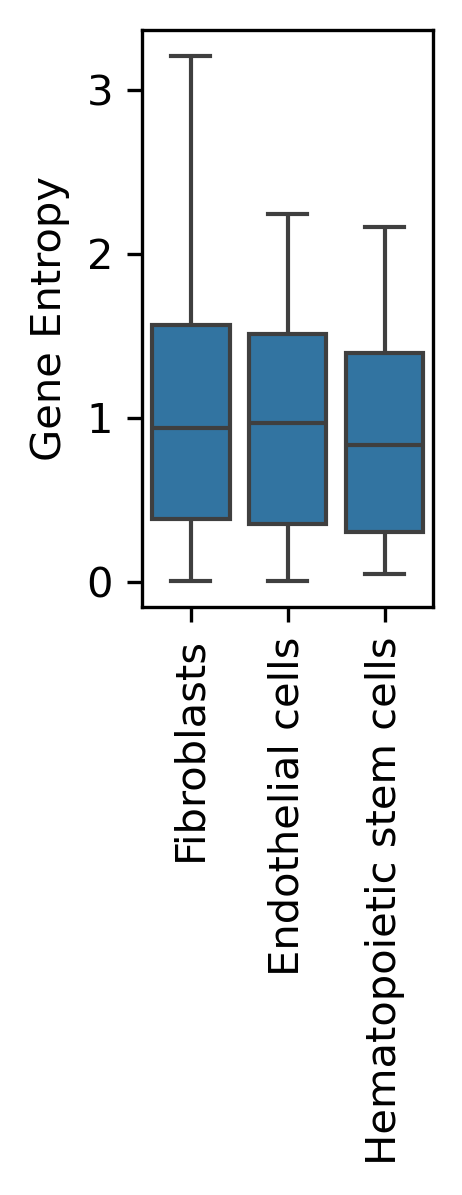

In [17]:
pangloa = pd.read_csv("/home/cstansbu/git_repositories/ONT-single-cell/config/gene_annotations/panglaodb.csv")
print(f"{pangloa.shape=}")
pangloa = pangloa[~pangloa['gene_name'].duplicated()]

cell_types = [
    "Endothelial cells",
    "Fibroblasts",
    "Hematopoietic stem cells",
]

pangloa = pangloa[pangloa['cell_type'].isin(cell_types)]

gene_mapper = dict(zip(pangloa.gene_name, pangloa.cell_type))
print(f"{pangloa.shape=}")

tdf['cell_type'] = tdf['gene_name'].map(gene_mapper)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 1.25, 2.5


sns.boxplot(data=tdf, 
            x='cell_type',
            y='entropy')

plt.ylabel("Gene Entropy")
plt.xlabel("")
plt.gca().tick_params(axis='x', rotation=90)


# GATA2

In [18]:
pdf = df.copy()
pdf = pdf[pdf['gene_name'] == 'GATA2']

pdf

,gene_id,gene_name,gene_biotype,transcript_id,transcript_name,transcript_biotype,gene_counts,transcript_counts,gene_CPM,log_CPM,n_isoforms,tid,short_name
55731,ENSG00000179348,GATA2,protein_coding,ENST00000430265,GATA2-202,protein_coding,3297,19,35.433338,3.595484,4,1,202
55732,ENSG00000179348,GATA2,protein_coding,ENST00000487848,GATA2-203,protein_coding,3297,19,35.433338,3.595484,4,2,203
55733,ENSG00000179348,GATA2,protein_coding,ENST00000492608,GATA2-205,protein_coding,3297,84,35.433338,3.595484,4,3,205
55727,ENSG00000179348,GATA2,protein_coding,ENST00000696672,GATA2-213,protein_coding,3297,342,35.433338,3.595484,4,4,213


In [19]:
sdf = grn.load_scenic_database()
sdf.head()

,ABL1,ACAA1,ADNP,ADNP2,AEBP2,AFF4,AHCTF1,AHDC1,AHR,AHRR,...,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN5C,ZSCAN9,ZXDA,ZXDB,ZXDC,ZZZ3
gene_name,,,,,,,,,,,,,,,,,,,,,
A1BG,1.65,0.0,5.060,0.0,0.0,8.470,6.400,2.290,0.83060,0.0,...,0.0,0.0,0.0,0.0,1.32,1.448,1.790,1.484333,0.0,1.37
A1BG-AS1,0.00,0.0,0.545,0.0,0.0,0.379,0.000,0.000,0.14640,0.0,...,0.0,0.0,0.0,0.0,0.00,0.770,1.465,1.032333,0.0,0.00
A1CF,1.55,0.0,0.000,0.0,0.0,3.780,4.880,1.092,0.31400,0.0,...,0.0,0.0,0.0,0.0,0.00,0.920,2.865,1.910000,0.0,2.67
A2M,1.39,0.0,0.827,0.0,0.0,4.700,0.810,1.055,0.27314,0.0,...,0.0,0.0,0.0,0.0,0.00,0.535,0.885,0.698000,0.0,3.45
A2M-AS1,0.00,0.0,0.000,0.0,0.0,1.450,0.111,0.000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.00,0.800,0.000,0.059333,0.0,0.00


In [20]:
query = 'GATA2'
quantile = 0.99    
targets = grn.get_targets(sdf, query, quantile)
print(len(targets))

271


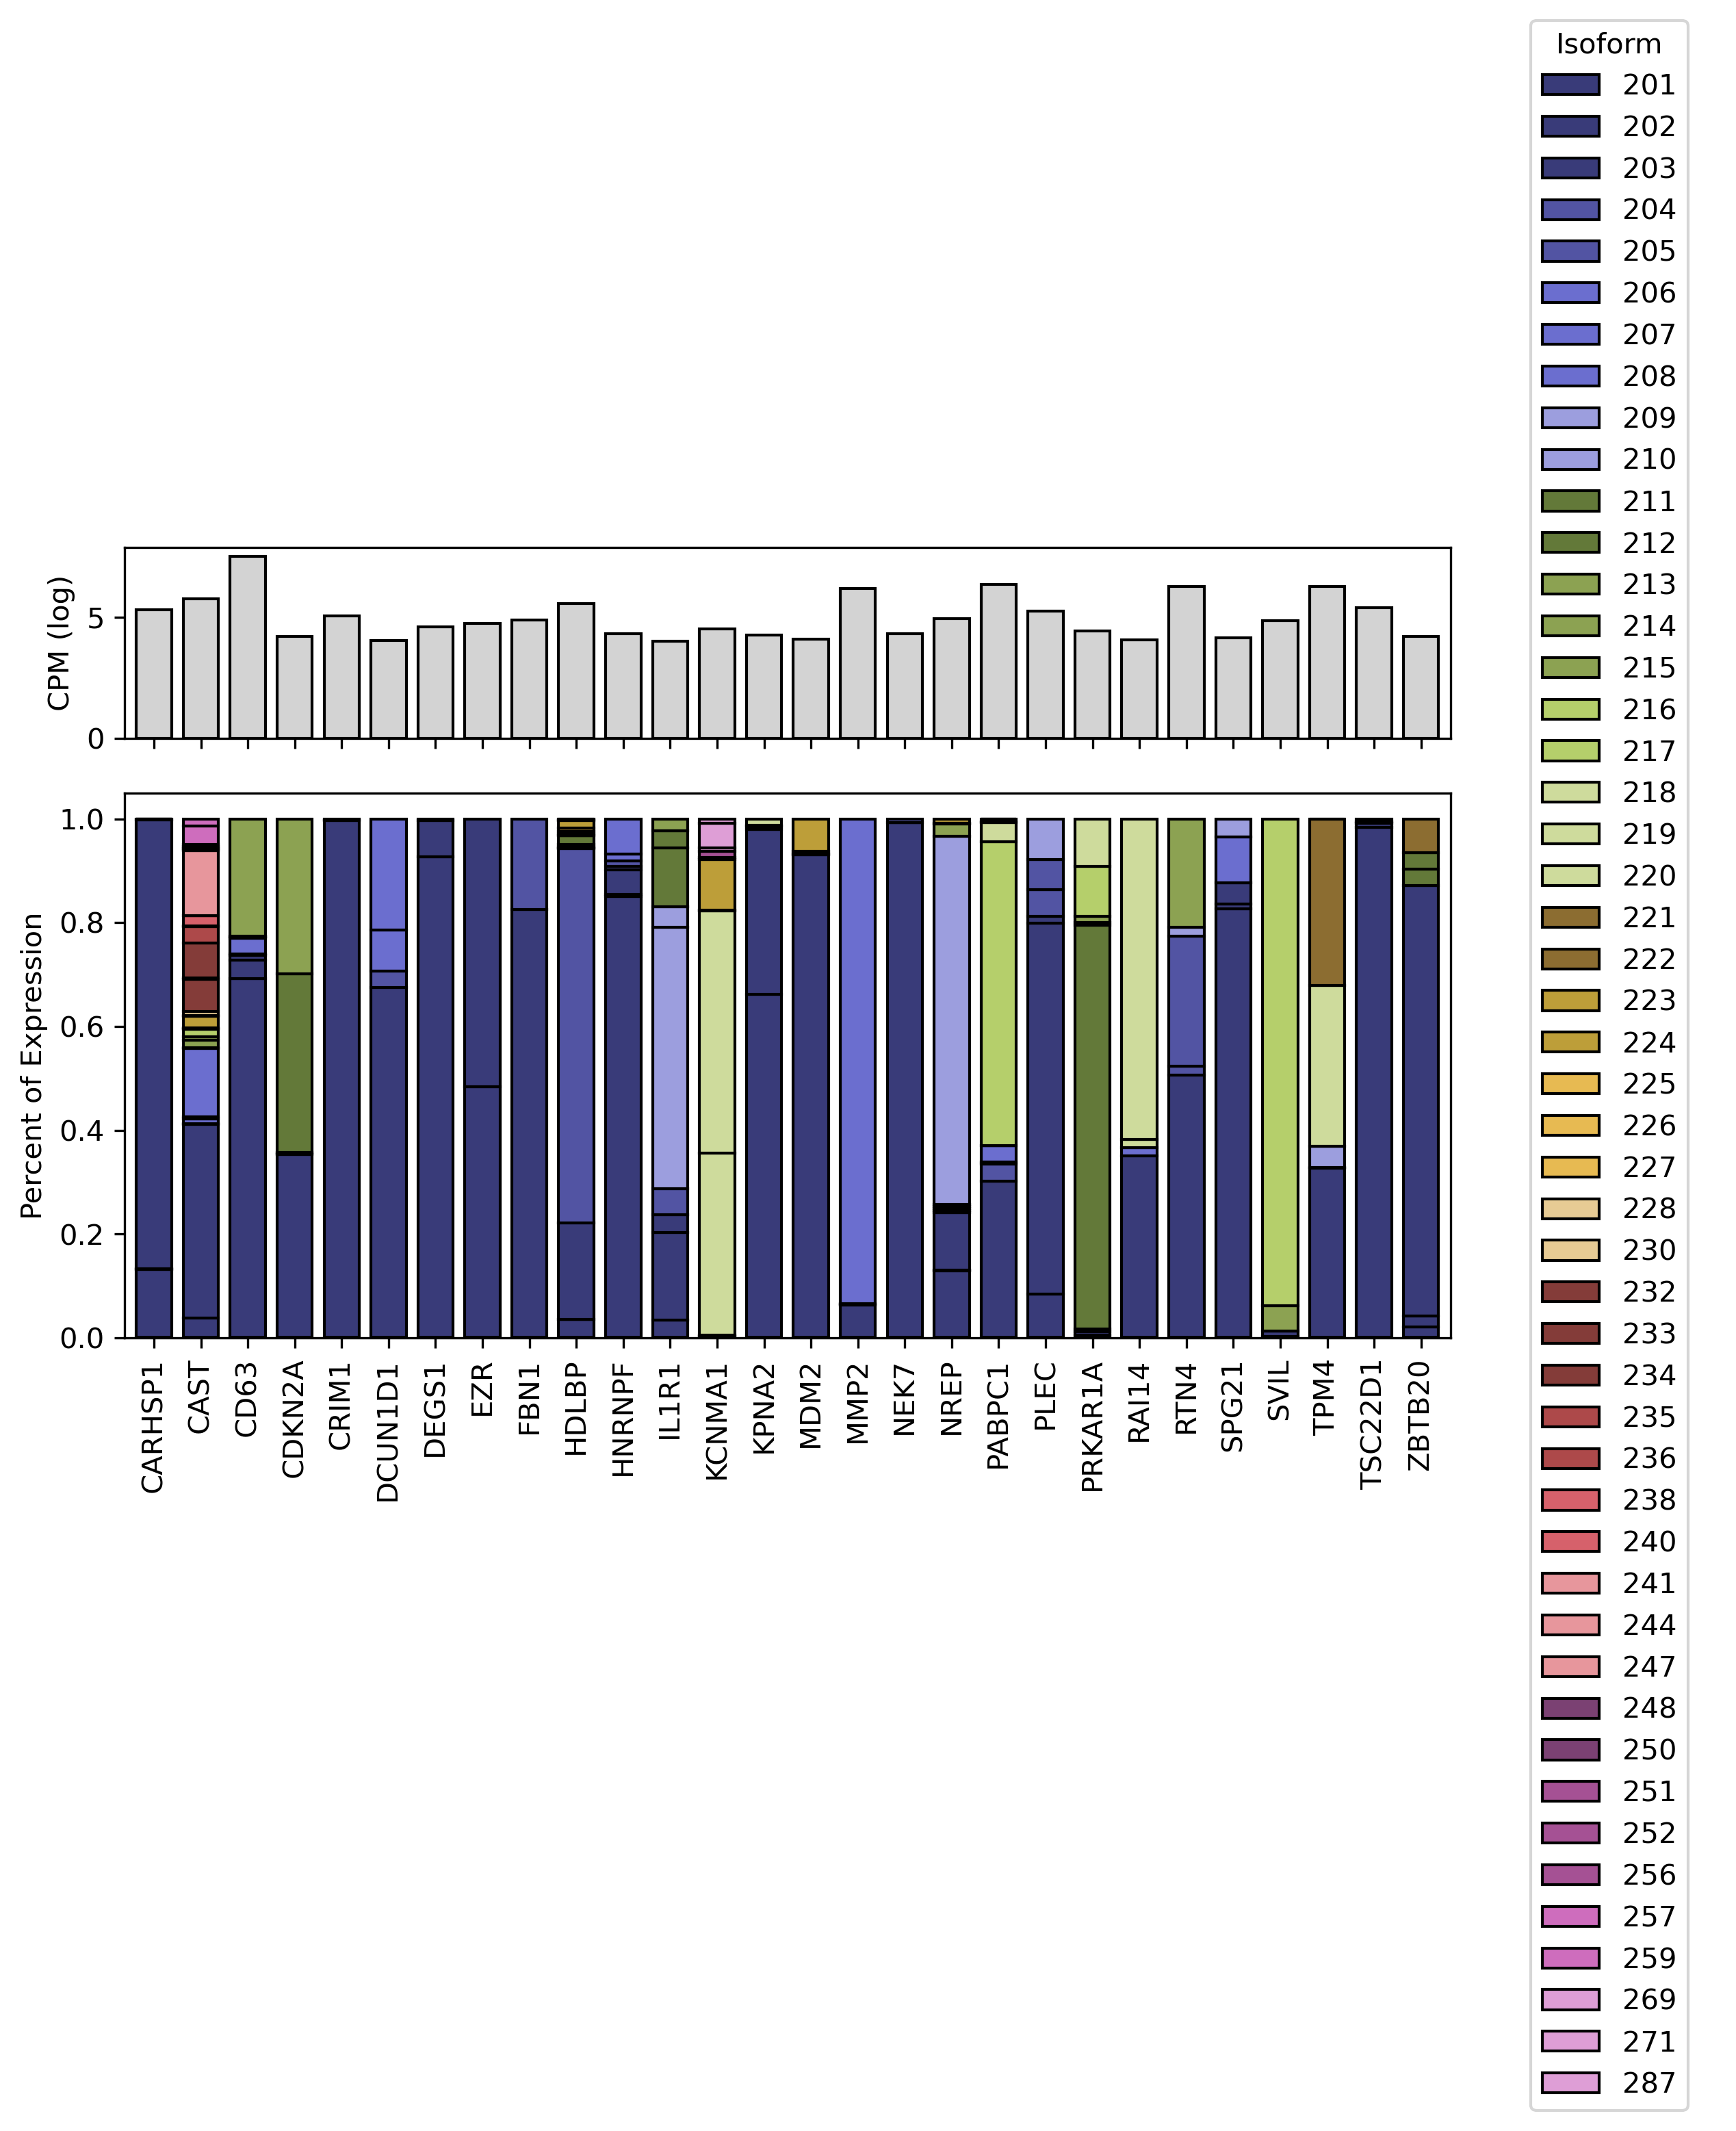

In [21]:
pdf = df.copy()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 10, 5
iso.plot_isoform_expression(df, 
                        targets, 
                        count_threshold=5000)

# GO annotations

go_biological_process
hematopoietic stem cell proliferation      32
hematopoietic stem cell homeostasis        28
hematopoietic stem cell differentiation    25
Name: count, dtype: int64
['ADAR', 'ADGRG1', 'ARHGEF5', 'ARMCX1', 'BAP1', 'CCN3', 'CRISPLD1', 'EMCN', 'EXT1', 'FOXA3', 'FSTL1', 'GATA2', 'GLIS2', 'GPR56', 'GPRASP2', 'MYCT1', 'NBEA', 'NLE1', 'OCIAD1', 'OCIAD2', 'SEPTIN4', 'SOX4', 'TCIRG1', 'UBAP2L', 'ZNF251']
25


['ADAR',
 'ADGRG1',
 'ARHGEF5',
 'ARMCX1',
 'BAP1',
 'CCN3',
 'CRISPLD1',
 'EMCN',
 'EXT1',
 'FOXA3',
 'FSTL1',
 'GATA2',
 'GLIS2',
 'GPR56',
 'GPRASP2',
 'MYCT1',
 'NBEA',
 'NLE1',
 'OCIAD1',
 'OCIAD2',
 'SEPTIN4',
 'SOX4',
 'TCIRG1',
 'UBAP2L',
 'ZNF251']

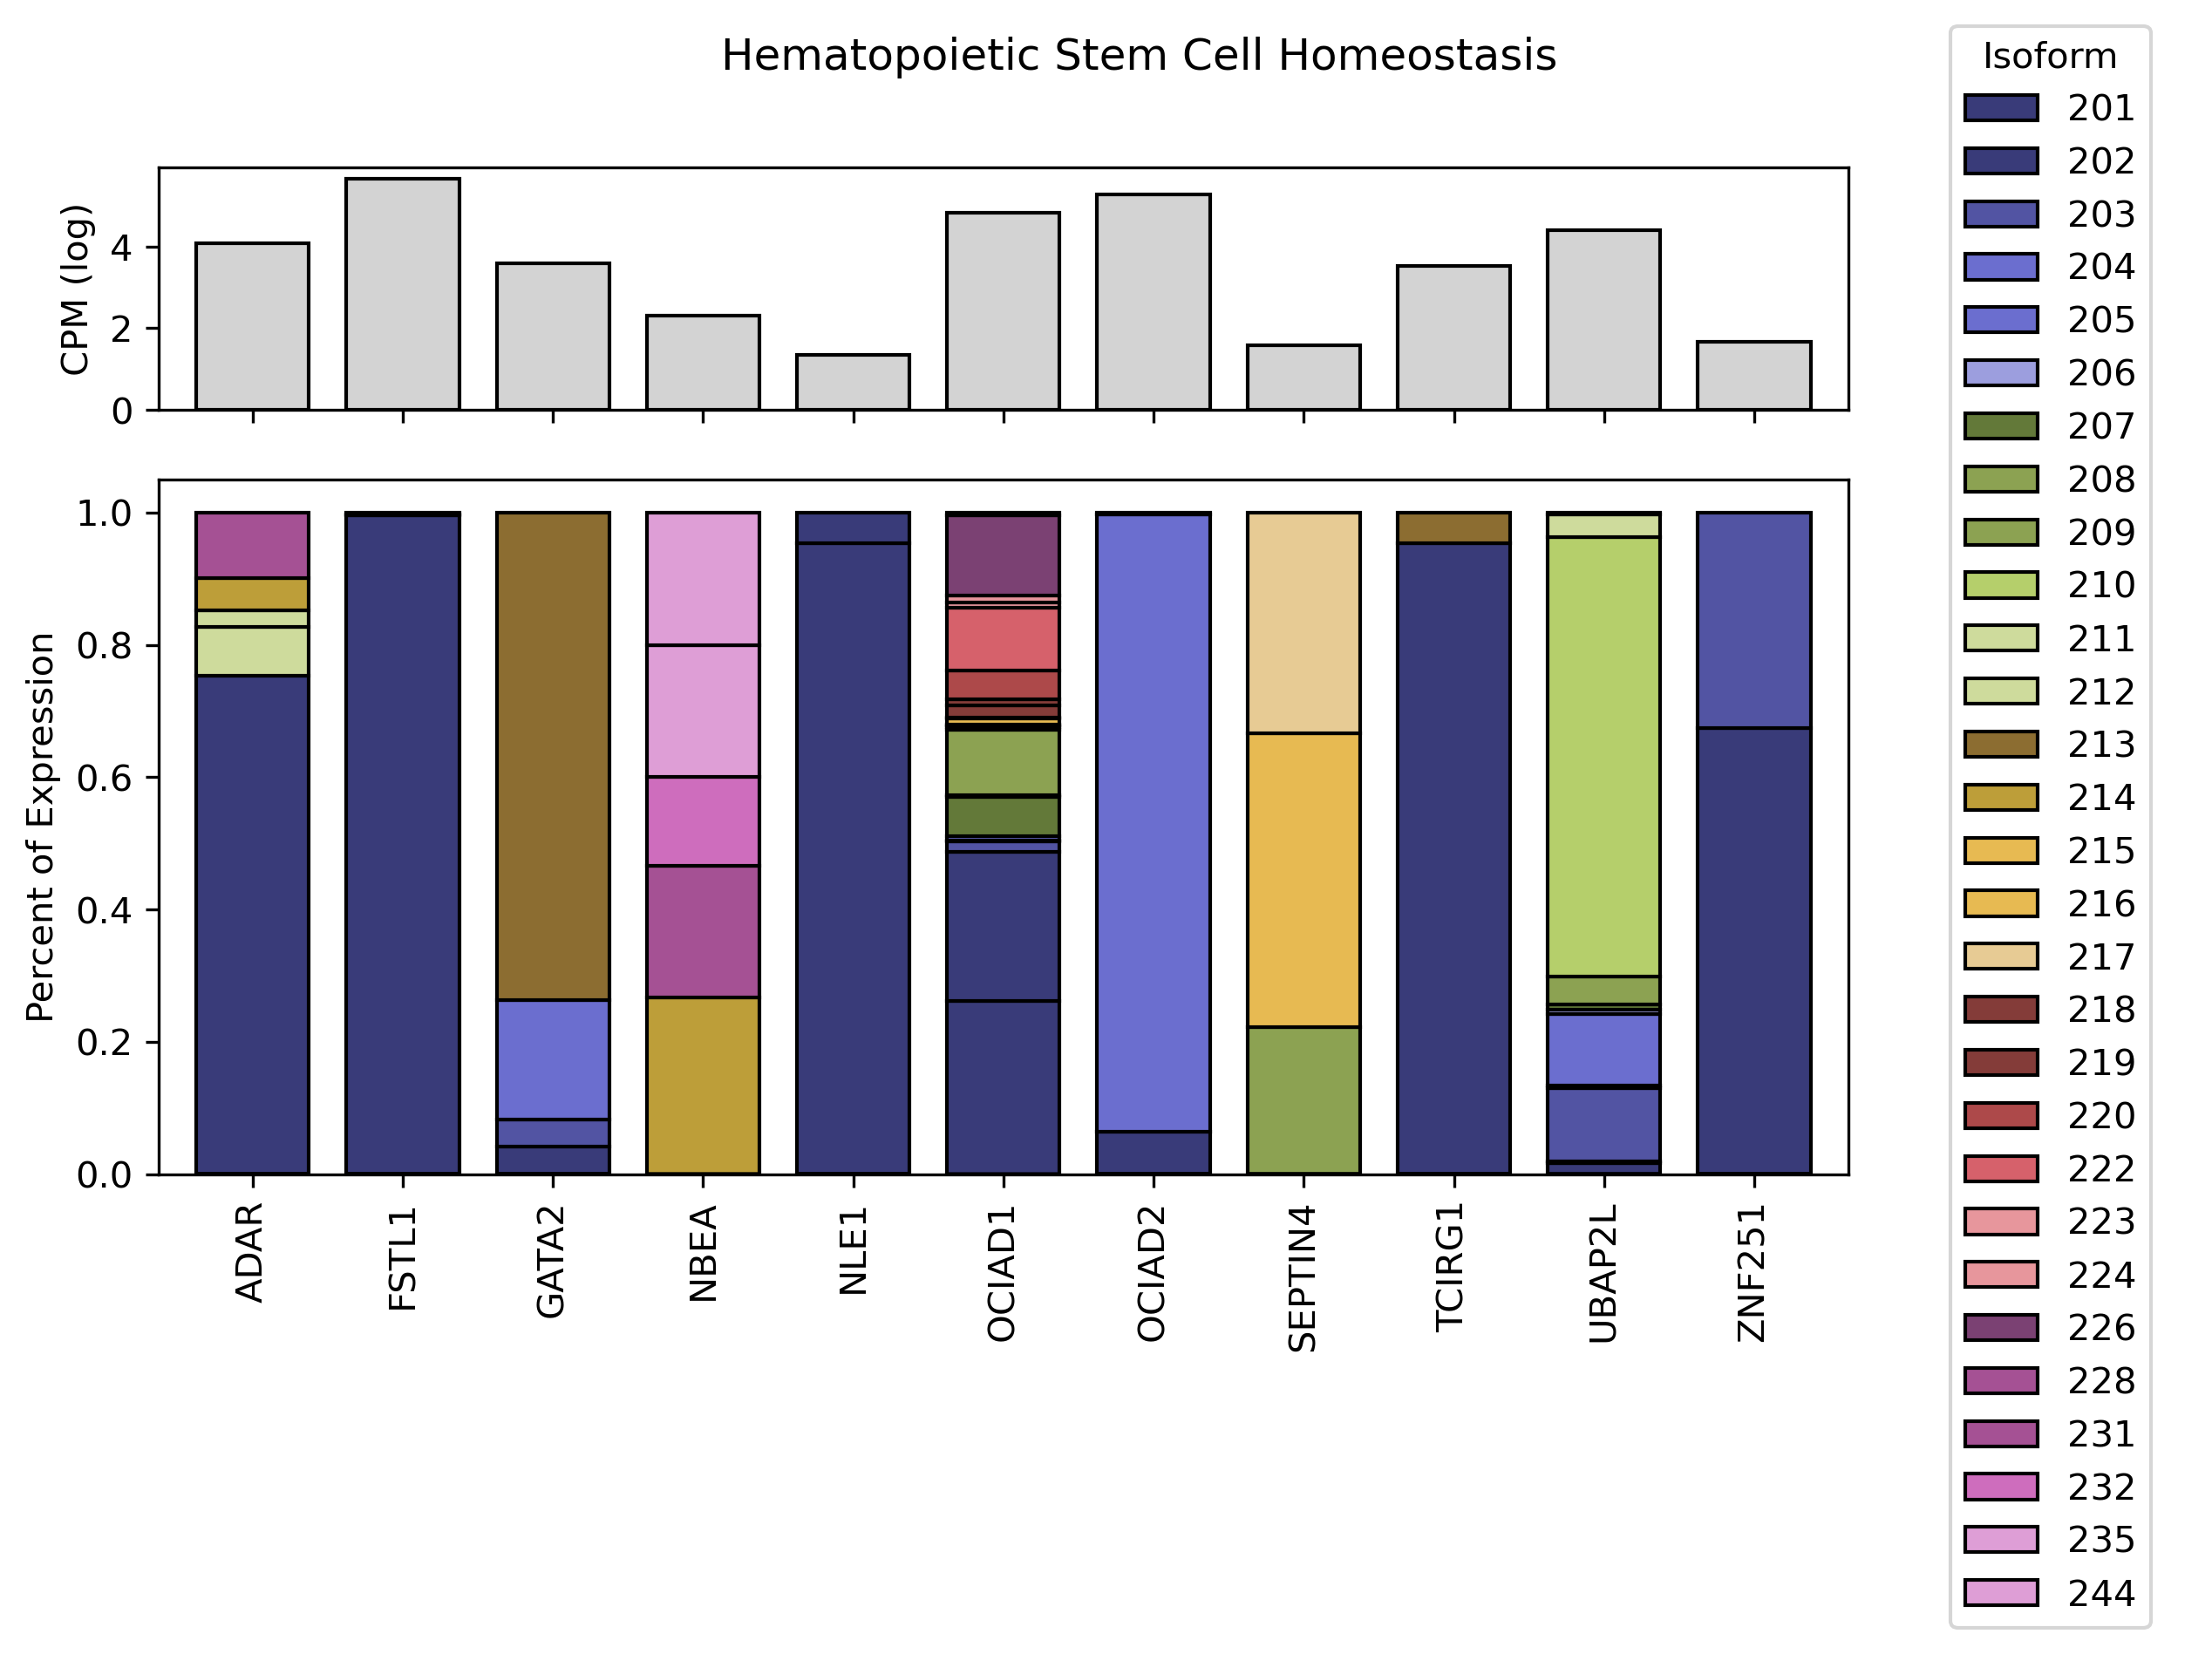

In [22]:
genes = pd.read_csv("/home/cstansbu/git_repositories/ONT-single-cell/config/gene_annotations/go_annotations.csv")
print(genes['go_biological_process'].value_counts())

pathway = 'hematopoietic stem cell homeostasis'
genes = genes[genes['go_biological_process'] == pathway]
genes = genes['gene_name'].unique()
print(sorted(genes))
print(len(genes))

iso.plot_isoform_expression(df, 
                        genes, 
                        count_threshold=1)

plt.suptitle(pathway.title())
sorted(genes)

# Network Plot

In [23]:
genes = pd.read_csv("/home/cstansbu/git_repositories/ONT-single-cell/config/gene_annotations/go_annotations.csv")
print(genes['go_biological_process'].value_counts())

pathway = 'hematopoietic stem cell homeostasis'
genes = genes[genes['go_biological_process'] == pathway]
genes = genes['gene_name'].unique()
print(sorted(genes))
print(len(genes))

pdf = df.copy()
pdf = iso.calculate_tx_percent(pdf, genes=genes, count_threshold=1)
pdf = iso.calculate_gene_entropy(pdf)
pdf = pdf.sort_values(by='entropy', ascending=False)
print()
print(sorted(pdf['gene_name'].unique()))
pdf.head()

go_biological_process
hematopoietic stem cell proliferation      32
hematopoietic stem cell homeostasis        28
hematopoietic stem cell differentiation    25
Name: count, dtype: int64
['ADAR', 'ADGRG1', 'ARHGEF5', 'ARMCX1', 'BAP1', 'CCN3', 'CRISPLD1', 'EMCN', 'EXT1', 'FOXA3', 'FSTL1', 'GATA2', 'GLIS2', 'GPR56', 'GPRASP2', 'MYCT1', 'NBEA', 'NLE1', 'OCIAD1', 'OCIAD2', 'SEPTIN4', 'SOX4', 'TCIRG1', 'UBAP2L', 'ZNF251']
25

['ADAR', 'FSTL1', 'GATA2', 'NBEA', 'NLE1', 'OCIAD1', 'OCIAD2', 'SEPTIN4', 'TCIRG1', 'UBAP2L', 'ZNF251']


,gene_id,gene_name,gene_biotype,transcript_id,transcript_name,transcript_biotype,gene_counts,transcript_counts,gene_CPM,log_CPM,n_isoforms,tid,short_name,tx_percent,entropy
24,ENSG00000109180,OCIAD1,protein_coding,ENST00000503016,OCIAD1-207,protein_coding,11499,143,123.581424,4.82496,21,6,207,0.059733,3.092905
25,ENSG00000109180,OCIAD1,protein_coding,ENST00000504654,OCIAD1-208,protein_coding,11499,6,123.581424,4.82496,21,7,208,0.002506,3.092905
26,ENSG00000109180,OCIAD1,protein_coding,ENST00000505922,OCIAD1-209,protein_coding,11499,238,123.581424,4.82496,21,8,209,0.099415,3.092905
28,ENSG00000109180,OCIAD1,protein_coding,ENST00000508293,OCIAD1-213,protein_coding,11499,8,123.581424,4.82496,21,10,213,0.003342,3.092905
27,ENSG00000109180,OCIAD1,protein_coding,ENST00000506801,OCIAD1-210,protein_coding,11499,8,123.581424,4.82496,21,9,210,0.003342,3.092905


In [24]:
# loaad the scenic database
sdf = grn.load_scenic_database()
sdf.head()

,ABL1,ACAA1,ADNP,ADNP2,AEBP2,AFF4,AHCTF1,AHDC1,AHR,AHRR,...,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN5C,ZSCAN9,ZXDA,ZXDB,ZXDC,ZZZ3
gene_name,,,,,,,,,,,,,,,,,,,,,
A1BG,1.65,0.0,5.060,0.0,0.0,8.470,6.400,2.290,0.83060,0.0,...,0.0,0.0,0.0,0.0,1.32,1.448,1.790,1.484333,0.0,1.37
A1BG-AS1,0.00,0.0,0.545,0.0,0.0,0.379,0.000,0.000,0.14640,0.0,...,0.0,0.0,0.0,0.0,0.00,0.770,1.465,1.032333,0.0,0.00
A1CF,1.55,0.0,0.000,0.0,0.0,3.780,4.880,1.092,0.31400,0.0,...,0.0,0.0,0.0,0.0,0.00,0.920,2.865,1.910000,0.0,2.67
A2M,1.39,0.0,0.827,0.0,0.0,4.700,0.810,1.055,0.27314,0.0,...,0.0,0.0,0.0,0.0,0.00,0.535,0.885,0.698000,0.0,3.45
A2M-AS1,0.00,0.0,0.000,0.0,0.0,1.450,0.111,0.000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.00,0.800,0.000,0.059333,0.0,0.00


/home/cstansbu/miniconda3/envs/bioinf/lib/python3.10/site-packages/networkx/drawing/layout.py:725: RuntimeWarning: divide by zero encountered in divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


Text(0.5, 1.0, 'Hematopoietic stem cell homeostasis')

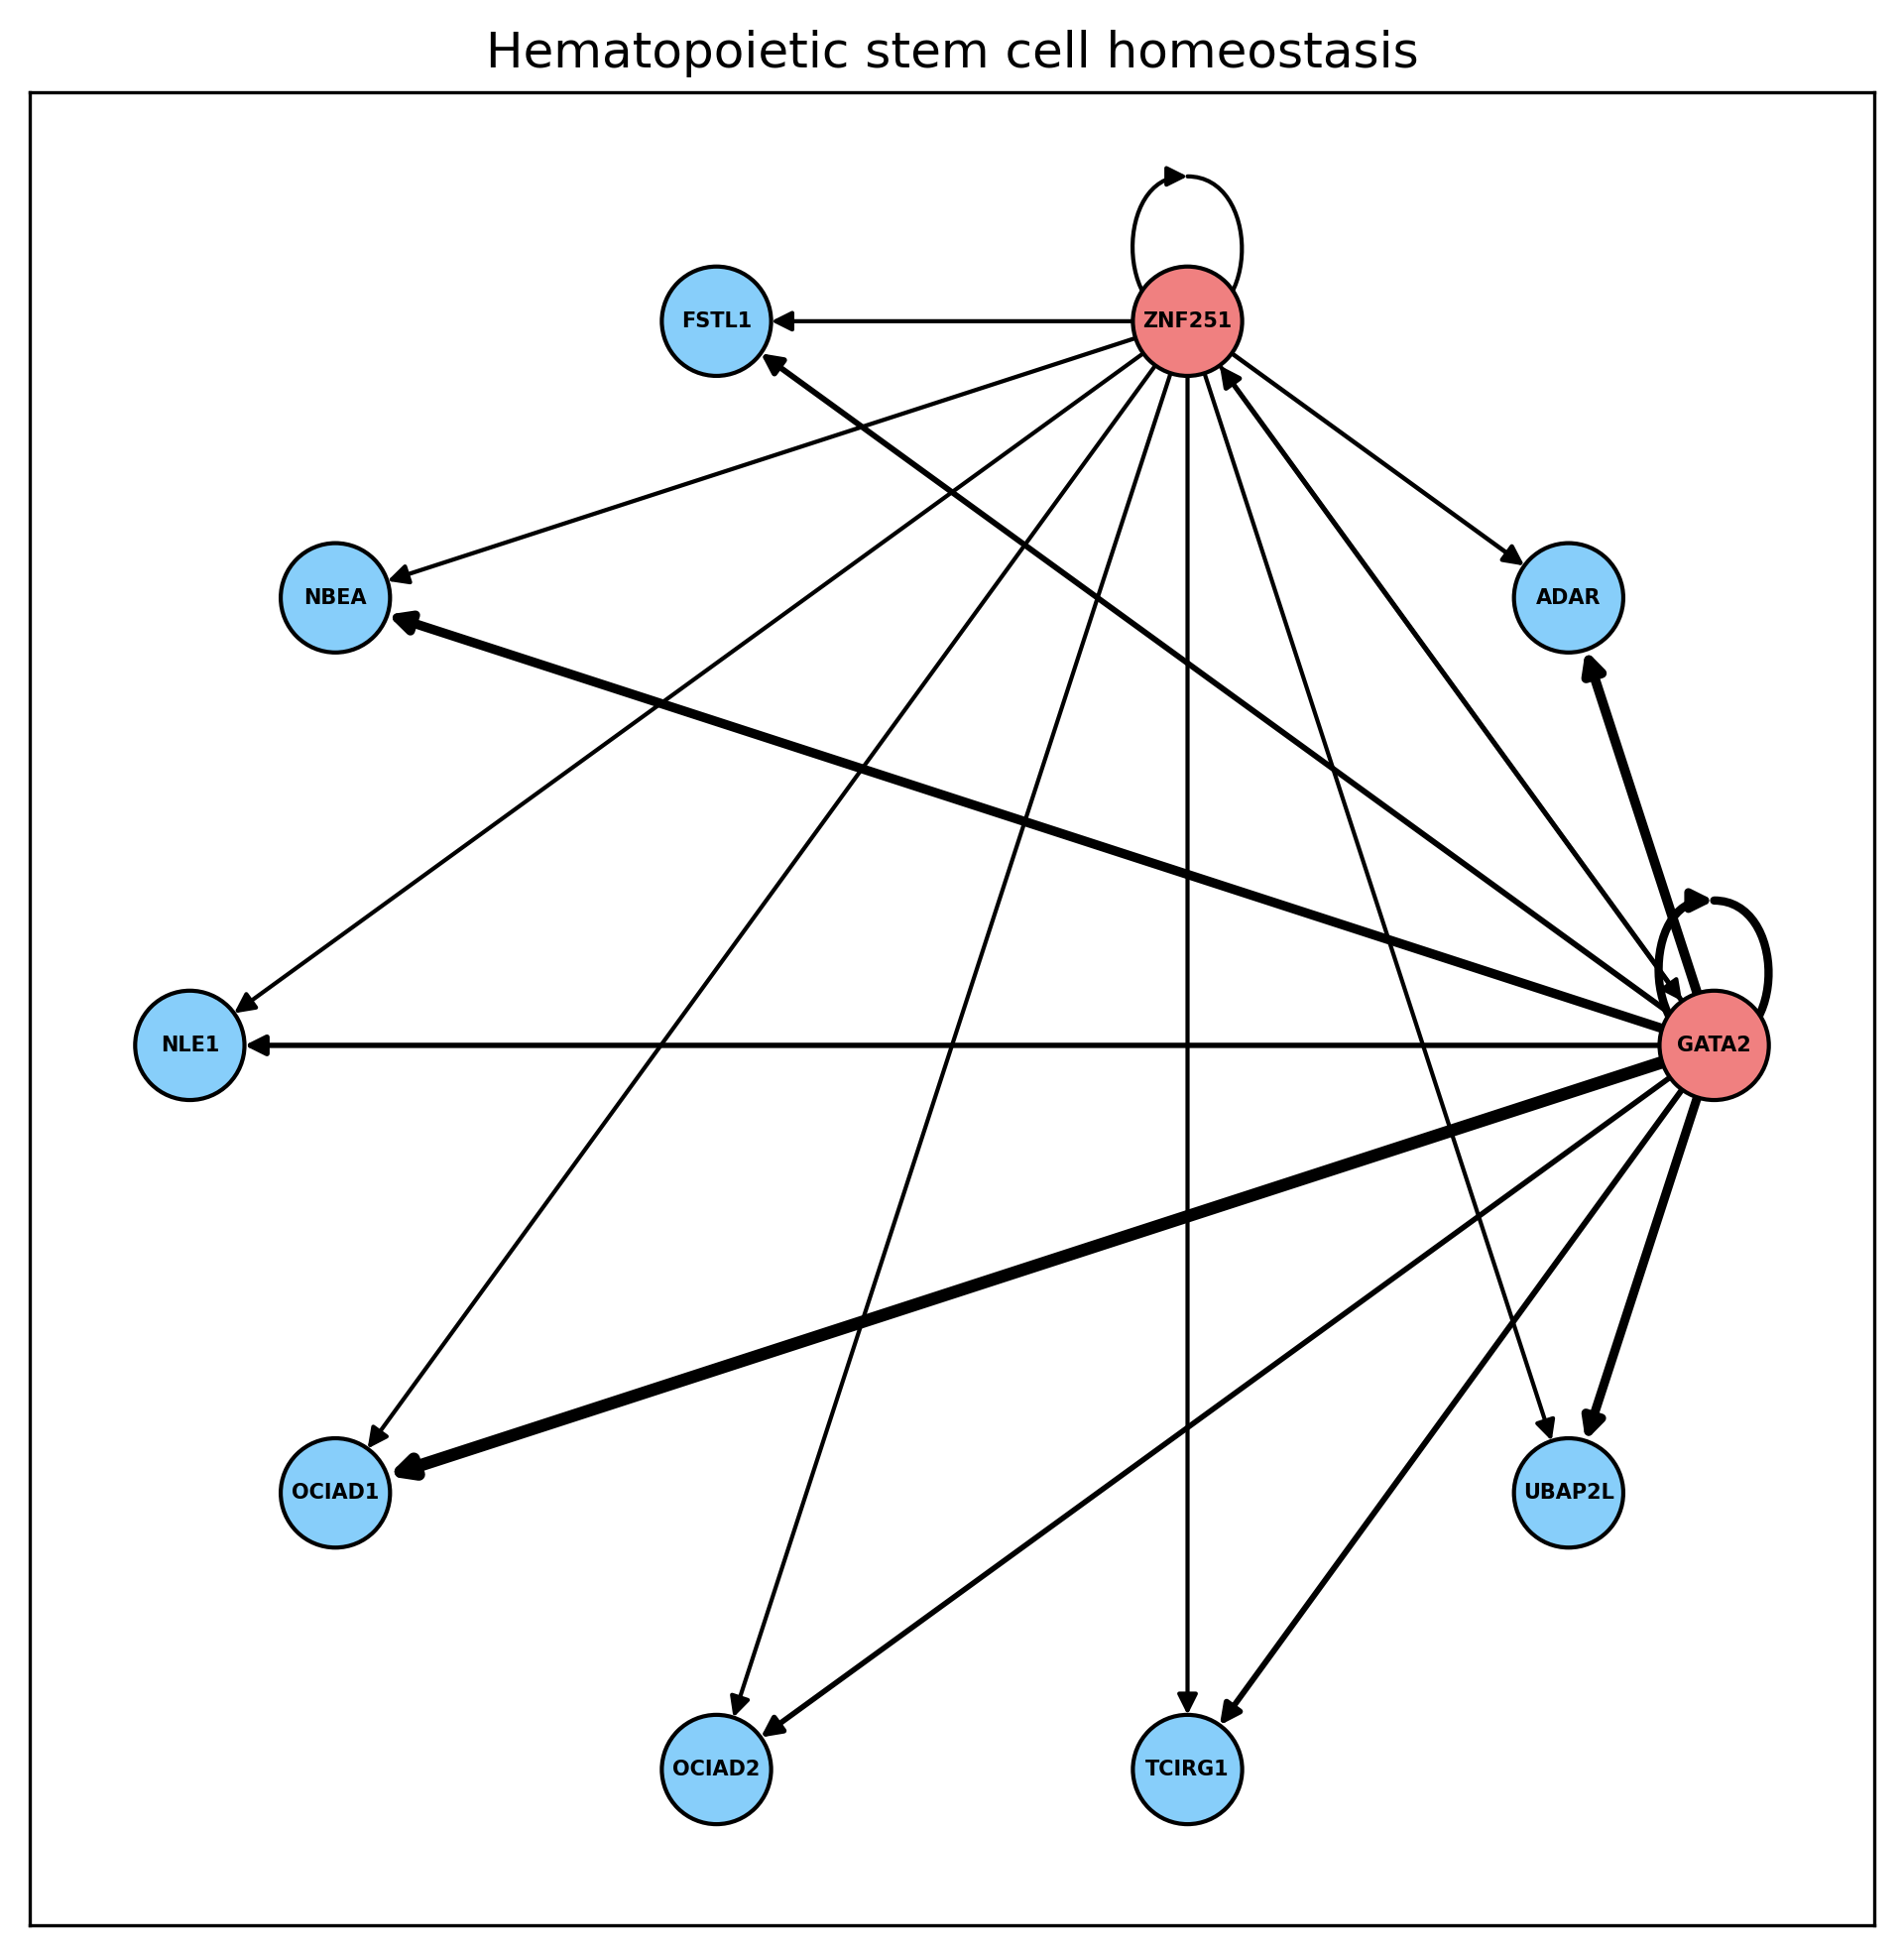

In [25]:
# build regulatory network from SCNENIC
reload(iso)
reload(grn)

genes_only = iso.extract_gene_data(pdf)
G = grn.create_scenic_network(genes_only, sdf)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 8, 8

grn.visualize_network(G)

plt.title("Hematopoietic stem cell homeostasis")

# Archive

In [26]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
# def plot_scenic_network(
#     G,
#     node_size_scale=1000,
#     node_color="lightblue",
#     tf_color="orange",
#     edge_color="k",
#     label_nodes=True,
#     font_size=8,
#     k=5,  # Spring layout parameter for spacing
#     iterations=100,
# ):
#     """Plots a SCENIC gene regulatory network with customizable aesthetics.

#     Args:
#         G (nx.DiGraph): The directed network to plot.
#         figsize (tuple): The size of the figure (width, height). Default is (10, 10).
#         node_size_scale (float): Scaling factor for node size based on expression. Default is 50.
#         node_color (str): Color of the nodes. Default is "lightblue".
#         tf_color (str): Color of transcription factor nodes. Default is "orange".
#         edge_color (str): Color of the edges. Default is "grey".
#         label_nodes (bool): Whether to label nodes. Default is True.
#         font_size (int): Font size for node labels. Default is 8.
#         layout (str): Layout algorithm to use. Options: "spring" (default), "kamada_kawai", "circular".
#         k (float): Optimal distance between nodes in spring layout (higher values increase spacing). Default is 0.8.
#         iterations (int): Number of iterations for the spring layout algorithm. Default is 100.
#     """
    
#     # Node positions using Kamada-Kawai layout
#     pos = nx.kamada_kawai_layout(G)

#     # Node sizes based on gene expression (using log_CPM)
#     node_sizes = [G.nodes[n].get("log_CPM", 0) * node_size_scale + 50 for n in G.nodes]

#     # Identifying transcription factor nodes (you may need to customize this based on your data)
#     tf_nodes = [n for n in G.nodes if G.nodes[n].get("is_tf", False)]

#     # --- Separate drawing of node types ---
    
#     # Draw regular gene nodes
#     regular_nodes = [n for n in G.nodes if n not in tf_nodes]
#     nx.draw_networkx_nodes(
#         G,
#         pos,
#         nodelist=regular_nodes,
#         node_size=[node_sizes[i] for i, n in enumerate(G.nodes) if n not in tf_nodes],
#         node_color=node_color,
#         node_shape="o",
#         linewidths=0.5,
#         edgecolors="black",  
#     )

#     # Draw transcription factor nodes
#     nx.draw_networkx_nodes(
#         G,
#         pos,
#         nodelist=tf_nodes,
#         node_size=[node_sizes[i] for i, n in enumerate(G.nodes) if n in tf_nodes],
#         node_color=tf_color,
#         node_shape="s",
#         linewidths=0.5,
#         edgecolors="black",
#     )
    
#     # --- Draw edges with arrows stopping at node boundary ---
    
#     # This part is tricky due to Matplotlib's node drawing logic
#     # We'll approximate it for now (perfect solution may require custom arrow drawing)

#     # Draw edges with width proportional to weight
#     edge_weights = nx.get_edge_attributes(G, "weight")
#     nx.draw_networkx_edges(
#         G,
#         pos,
#         width=[edge_weights[e] * 0.5 for e in G.edges()],
#         edge_color=edge_color,
#         arrows=True,
#         arrowstyle="-|>",  # This arrow style stops closer to the node
#         arrowsize=10,     # Adjust for finer control
#     )    

#     # Label nodes
#     if label_nodes:
#         nx.draw_networkx_labels(G, pos, font_size=font_size)

#     plt.axis("off")
#     plt.title("SCENIC Gene Regulatory Network")
#     plt.show()
    
    
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams['figure.figsize'] = 10, 10
# plot_scenic_network(G)

In [ ]:
break

In [ ]:
# def visualize_isoform_network(df, gene_node_size=2000, tx_percent_scale=1000,
#                               gene_color='skyblue', transcript_color='lightcoral',
#                               gene_node_shape='s', transcript_node_shape='o',
#                               node_kwargs={}, edge_kwargs={}, label_kwargs={}):
#     """
#     Visualizes a gene-isoform network with enhanced clarity and scalability,
#     drawing all genes in one color and all transcripts in another.

#     Args:
#         df: pandas DataFrame containing gene_name, short_name (transcript name), and tx_percent columns.
#         gene_node_size: Base size of gene nodes (default: 2500).
#         tx_percent_scale: Scaling factor for transcript node size based on tx_percent (default: 3000).
#         gene_color: Color for gene nodes (default: 'skyblue').
#         transcript_color: Color for transcript nodes (default: 'lightcoral').
#         gene_node_shape: Shape for gene nodes (default: 's' for square).
#         transcript_node_shape: Shape for transcript nodes (default: 'o' for circle).
#         node_kwargs: Additional keyword arguments to pass to nx.draw_networkx_nodes.
#         edge_kwargs: Additional keyword arguments to pass to nx.draw_networkx_edges.
#         label_kwargs: Additional keyword arguments to pass to nx.draw_networkx_labels.
#     """

#     G = nx.Graph()

#     # --- Add Nodes ---
#     for gene in df['gene_name'].unique():
#         G.add_node(gene, size=gene_node_size, color=gene_color, shape=gene_node_shape)
    
#     for _, row in df.iterrows():
#         G.add_node(row['short_name'], size=row['tx_percent'] * tx_percent_scale, 
#                    color=transcript_color, shape=transcript_node_shape)
#         G.add_edge(row['gene_name'], row['short_name'])

#     # --- Separate Drawing ---
#     gene_nodes = [n for n in G.nodes() if n in df['gene_name'].unique()]
#     transcript_nodes = [n for n in G.nodes() if n not in df['gene_name'].unique()]
    
    
#     # --- Layout & Drawing ---
#     pos = nx.kamada_kawai_layout(G) # More visually appealing layout for larger graphs
#     # Use bipartite layout if you prefer to have genes and transcripts in two separate lines.
#     # pos = nx.bipartite_layout(G, gene_nodes)

#     nx.draw_networkx_nodes(G, pos, nodelist=gene_nodes,
#                            node_size=gene_node_size,  
#                            node_color=gene_color,
#                            node_shape=gene_node_shape, **node_kwargs)

#     nx.draw_networkx_nodes(G, pos, nodelist=transcript_nodes,
#                            node_size=[G.nodes[n]['size'] for n in transcript_nodes],
#                            node_color=transcript_color,
#                            node_shape=transcript_node_shape, **node_kwargs)

#     nx.draw_networkx_edges(G, pos, **edge_kwargs)
#     nx.draw_networkx_labels(G, pos, **label_kwargs)

# visualize_isoform_network(pdf)

In [ ]:
break